In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import the necessary libraries:


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


#Read the dataset and display 5 images from benign and malignant dataset:



In [ ]:
parent_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train'
contents = os.listdir(parent_dir)
print(contents)


['malignant', 'benign']


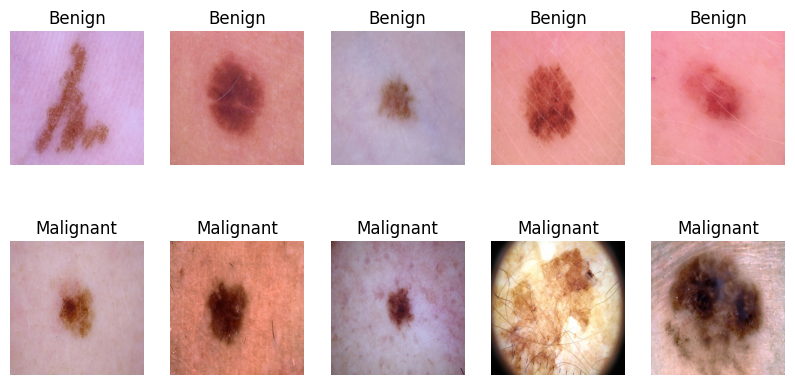

In [ ]:
train_benign_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train/benign'
train_malignant_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train/malignant'

benign_images = os.listdir(train_benign_dir)[:5]
malignant_images = os.listdir(train_malignant_dir)[:5]

plt.figure(figsize=(10, 5))
for i, image in enumerate(benign_images + malignant_images):
    img = load_img(os.path.join(train_benign_dir if i < 5 else train_malignant_dir, image))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Benign' if i < 5 else 'Malignant')
plt.show()


#Preprocess the benign and malignant data:


Found 2637 images belonging to 2 classes.
Found 2637 images belonging to 2 classes.


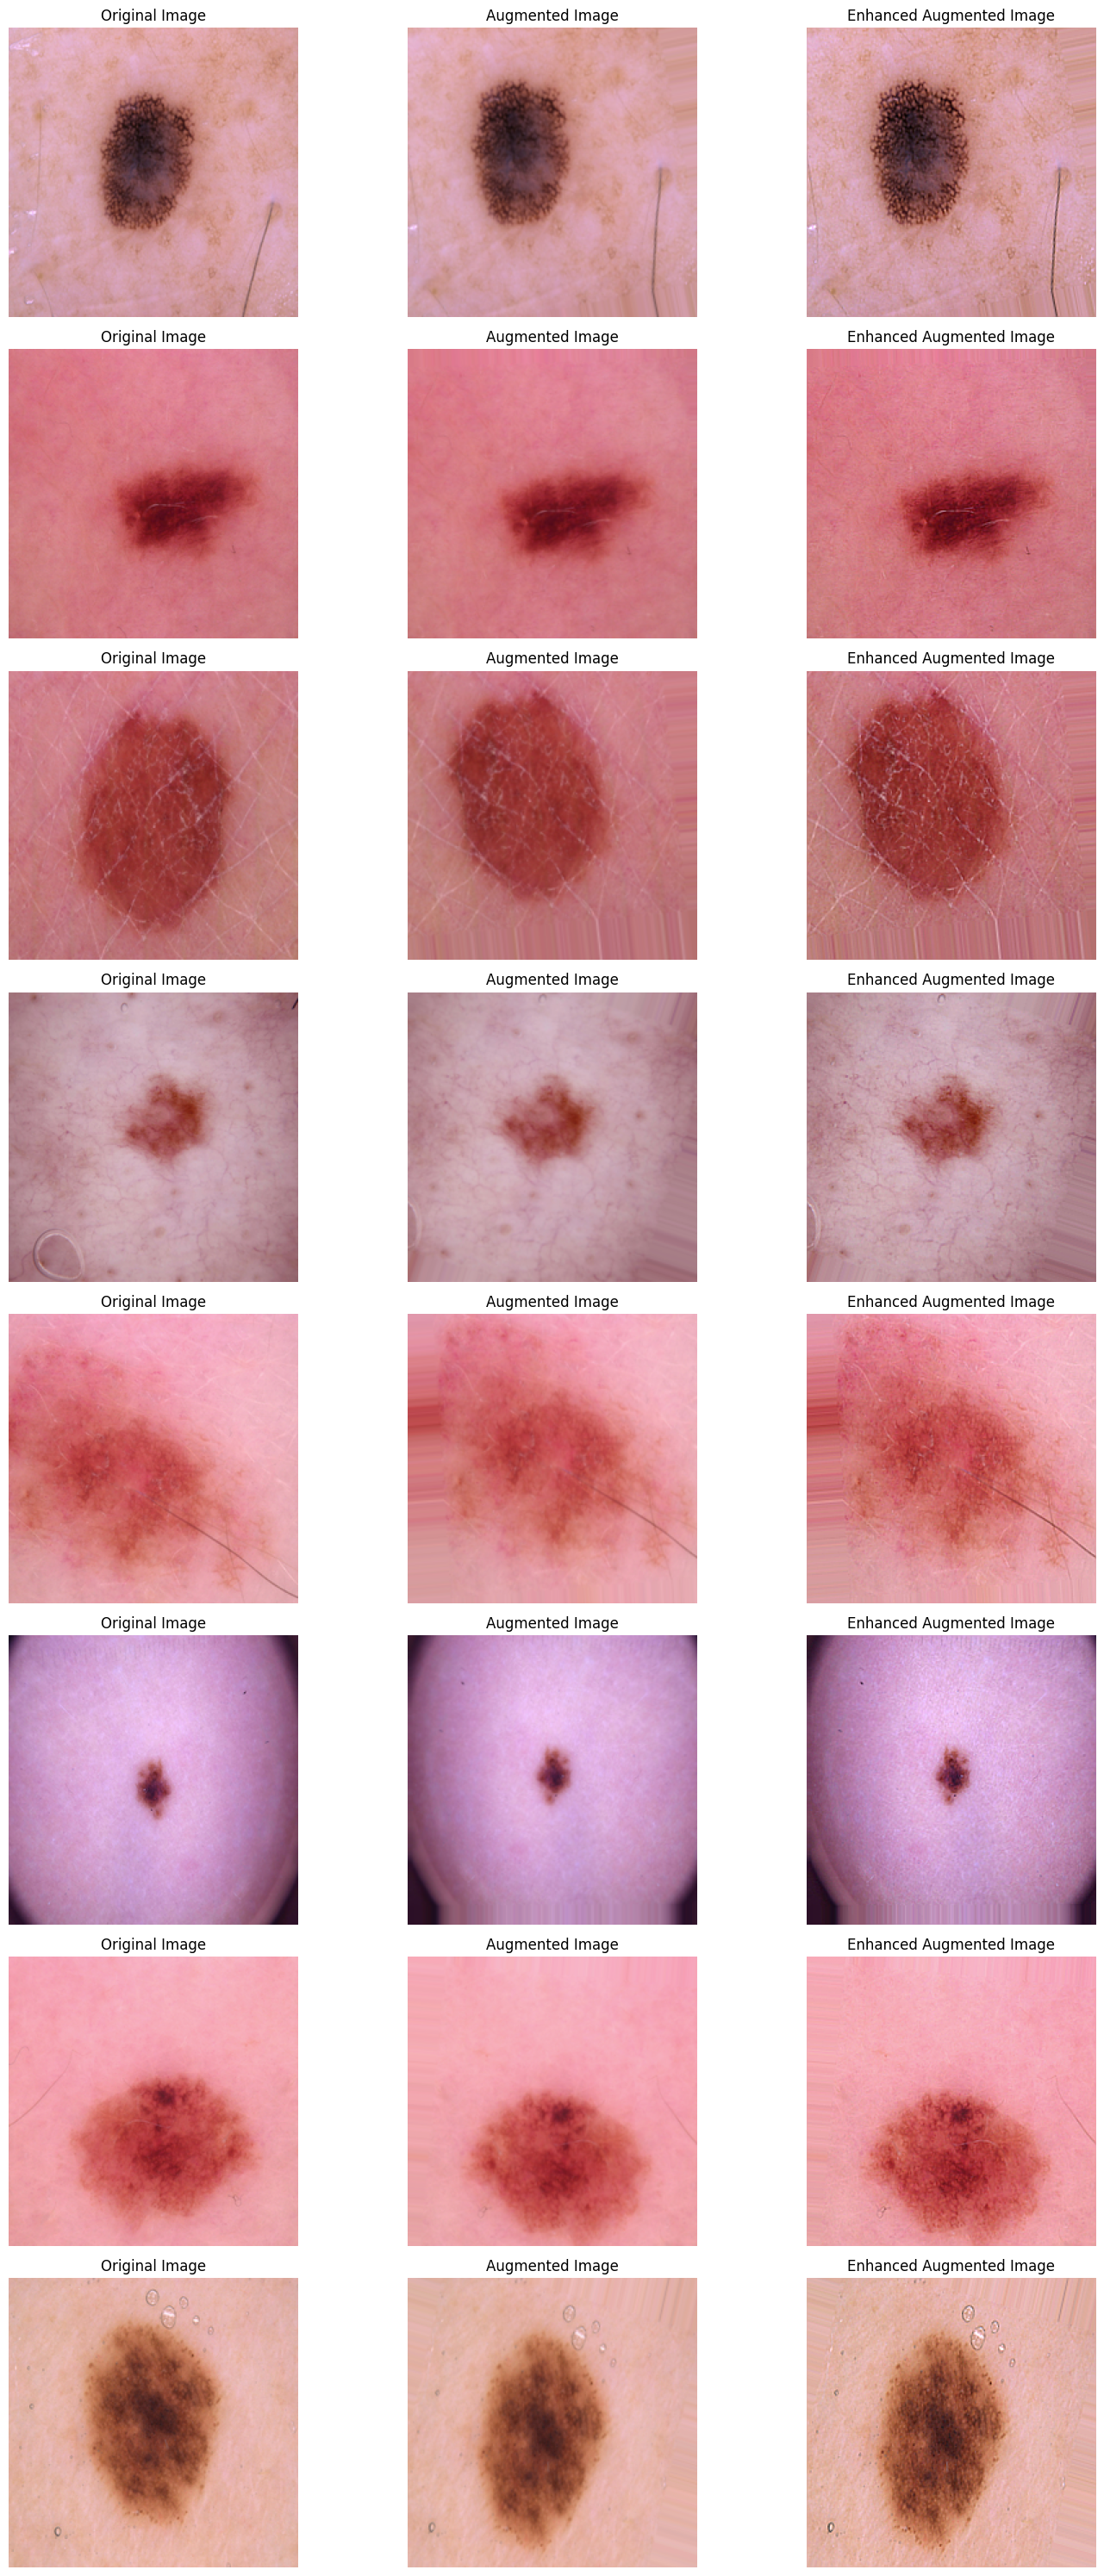

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageEnhance

# Data normalization for visualization (no augmentation)
vis_datagen = ImageDataGenerator(rescale=1./255)

# Flow original training images in batches from the directory (without augmentation)
original_train_generator = vis_datagen.flow_from_directory(
    '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train',
    target_size=(224, 224),
    batch_size=8,  # Set a smaller batch size for visualization
    class_mode='binary',
    shuffle=False  # Important: Turn off shuffling for visualization
)

# Load one batch of original training images without augmentation
original_images, _ = original_train_generator.next()

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flow augmented training images in batches from the directory
augmented_train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train',
    target_size=(224, 224),
    batch_size=8,  # Set a smaller batch size for visualization
    class_mode='binary',
    shuffle=False  # Important: Turn off shuffling for visualization
)

# Load one batch of augmented training images
augmented_images, _ = augmented_train_generator.next()

# Function to enhance sharpness of an image
def enhance_sharpness(image):
    enhancer = ImageEnhance.Sharpness(Image.fromarray((image * 255).astype('uint8')))
    enhanced_image = enhancer.enhance(4.0)  # Increase sharpness by a factor of 4.0
    # Convert enhanced image back to numpy array and rescale to [0, 1]
    enhanced_image = np.array(enhanced_image) / 255.0
    return enhanced_image

# Apply sharpness enhancement to the augmented images
enhanced_augmented_images = [enhance_sharpness(image) for image in augmented_images]

# Display original, augmented, and enhanced augmented images side by side
fig, axes = plt.subplots(8, 3, figsize=(15, 30))

for i in range(8):
    # Original image
    axes[i, 0].imshow(original_images[i])
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    # Augmented image
    axes[i, 1].imshow(augmented_images[i])
    axes[i, 1].set_title('Augmented Image')
    axes[i, 1].axis('off')

    # Enhanced Augmented image
    axes[i, 2].imshow(enhanced_augmented_images[i])
    axes[i, 2].set_title('Enhanced Augmented Image')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


#Make a bar and pie chart for the dataset:


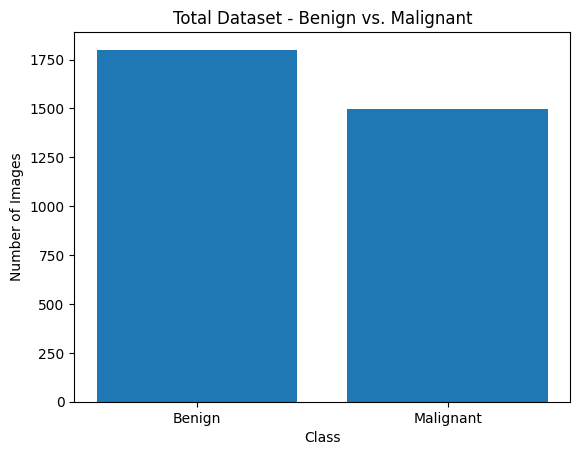

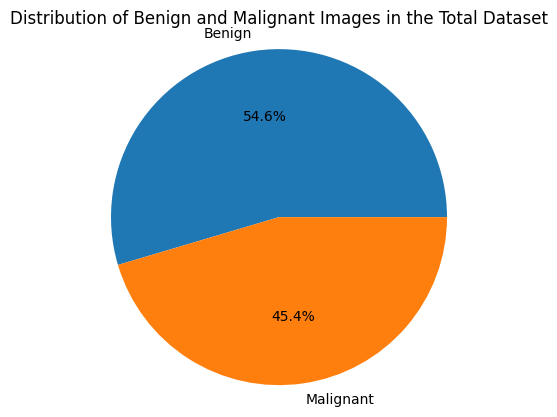

In [ ]:
import os
import matplotlib.pyplot as plt

# Directories for train and test datasets
train_benign_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train/benign'
train_malignant_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train/malignant'

test_benign_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/test/benign'
test_malignant_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/test/malignant'

# Count the number of images in the 'benign' class for the train and test datasets
num_train_benign_images = len(os.listdir(train_benign_dir))
num_test_benign_images = len(os.listdir(test_benign_dir))
total_benign_images = num_train_benign_images + num_test_benign_images

# Count the number of images in the 'malignant' class for the train and test datasets
num_train_malignant_images = len(os.listdir(train_malignant_dir))
num_test_malignant_images = len(os.listdir(test_malignant_dir))
total_malignant_images = num_train_malignant_images + num_test_malignant_images

# Visualization
# Bar chart
labels = ['Benign', 'Malignant']
counts = [total_benign_images, total_malignant_images]
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Dataset - Benign vs. Malignant')
plt.show()

# Pie chart
sizes = [total_benign_images, total_malignant_images]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Benign and Malignant Images in the Total Dataset')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [ ]:
import os

train_benign_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train/benign'
train_malignant_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train/malignant'

# Count the number of images in the 'benign' class
num_benign_images = len(os.listdir(train_benign_dir))

# Count the number of images in the 'malignant' class
num_malignant_images = len(os.listdir(train_malignant_dir))

print("Number of images in 'benign' class:", num_benign_images)
print("Number of images in 'malignant' class:", num_malignant_images)


Number of images in 'benign' class: 1440
Number of images in 'malignant' class: 1197


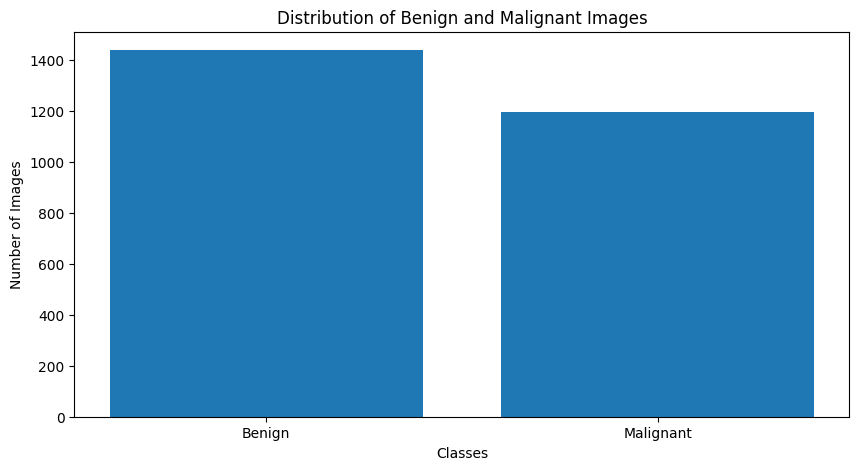

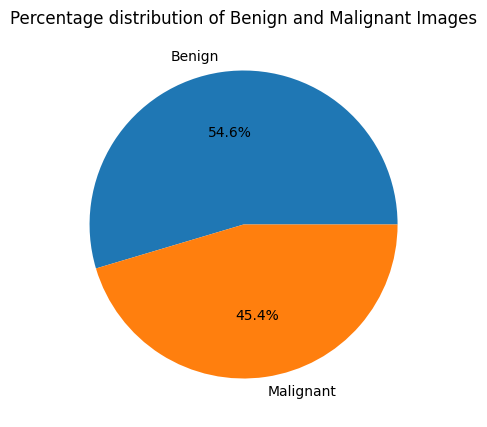

In [ ]:
benign_count = num_benign_images
malignant_count = num_malignant_images

plt.figure(figsize=(10, 5))
plt.bar(['Benign', 'Malignant'], [benign_count, malignant_count])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Benign and Malignant Images')
plt.show()

plt.figure(figsize=(5, 5))
plt.pie([benign_count, malignant_count], labels=['Benign', 'Malignant'], autopct='%1.1f%%')
plt.title('Percentage distribution of Benign and Malignant Images')
plt.show()


In [ ]:
import os

test_benign_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/test/benign'
test_malignant_dir = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/test/malignant'

# Count the number of images in the 'benign' class
num_benign_images = len(os.listdir(test_benign_dir))

# Count the number of images in the 'malignant' class
num_malignant_images = len(os.listdir(test_malignant_dir))

print("Number of images in 'benign' class:", num_benign_images)
print("Number of images in 'malignant' class:", num_malignant_images)

Number of images in 'benign' class: 360
Number of images in 'malignant' class: 300


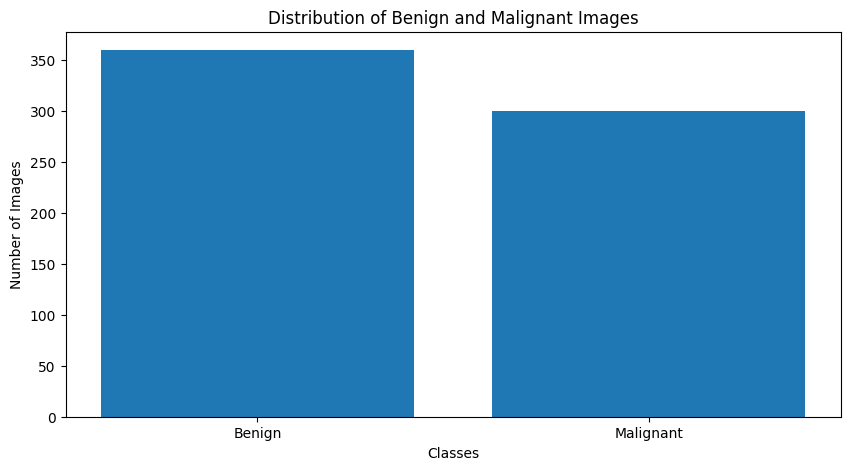

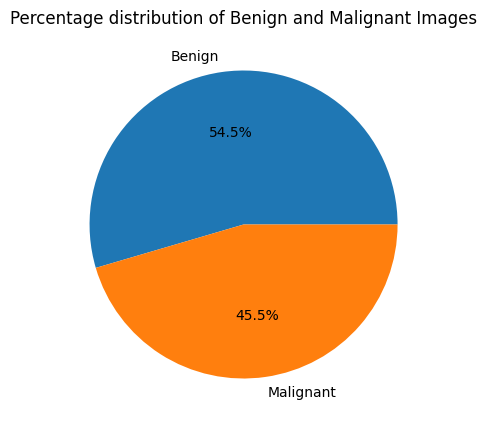

In [ ]:
benign_count = num_benign_images
malignant_count = num_malignant_images

plt.figure(figsize=(10, 5))
plt.bar(['Benign', 'Malignant'], [benign_count, malignant_count])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Benign and Malignant Images')
plt.show()

plt.figure(figsize=(5, 5))
plt.pie([benign_count, malignant_count], labels=['Benign', 'Malignant'], autopct='%1.1f%%')
plt.title('Percentage distribution of Benign and Malignant Images')
plt.show()


#DenseNet201


In [ ]:
# Importing necessary libraries
import cv2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import DenseNet201
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array



# Create labels for training and test data (0 for benign, 1 for malignant)
train_labels = np.concatenate([np.zeros(len(train_benign_images)), np.ones(len(train_malignant_images))])
test_labels = np.concatenate([np.zeros(len(test_benign_images)), np.ones(len(test_malignant_images))])

# Concatenate training and test data and labels
train_images = np.concatenate([train_benign_images, train_malignant_images])
test_images = np.concatenate([test_benign_images, test_malignant_images])

# Create a DenseNet model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_5 (Flatten)         (None, 94080)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               48169472  
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 66,491,969
Trainable params: 48,169,985
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data normalization
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and test
batch_size = 48
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)
validation_generator = val_test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)
test_generator = val_test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)

In [ ]:
# Train the model
epochs = 10
history = model.fit(train_generator, steps_per_epoch=len(train_images) // batch_size, epochs=epochs,
                    validation_data=validation_generator, validation_steps=len(test_images) // batch_size)

Epoch 1/10
82/82 [==============================] - 571s 4s/step - loss: 1.3754 - accuracy: 0.6689 - val_loss: 1.3911 - val_accuracy: 0.6489
Epoch 2/10
82/82 [==============================] - 590s 10s/step - loss: 1.2507 - accuracy: 0.6878 - val_loss: 1.2682 - val_accuracy: 0.6678
Epoch 3/10
82/82 [==============================] - 723s 9s/step - loss: 1.1263 - accuracy: 0.7067 - val_loss: 1.1519 - val_accuracy: 0.6867
Epoch 4/10
82/82 [==============================] - 509s 1s/step - loss: 1.0012 - accuracy: 0.7256 - val_loss: 1.0210 - val_accuracy: 0.7056
Epoch 5/10
82/82 [==============================] - 547s 6s/step - loss: 0.8765 - accuracy: 0.7444 - val_loss: 0.8988 - val_accuracy: 0.7244
Epoch 6/10
82/82 [==============================] - 571s 5s/step - loss: 0.7523 - accuracy: 0.7633 - val_loss: 0.7749 - val_accuracy: 0.7433
Epoch 7/10
82/82 [==============================] - 583s 6s/step - loss: 0.6280 - accuracy: 0.7822 - val_loss: 0.6771 - val_accuracy: 0.7622
Epoch 8/10
8

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.8034
Test Loss: 0.2796


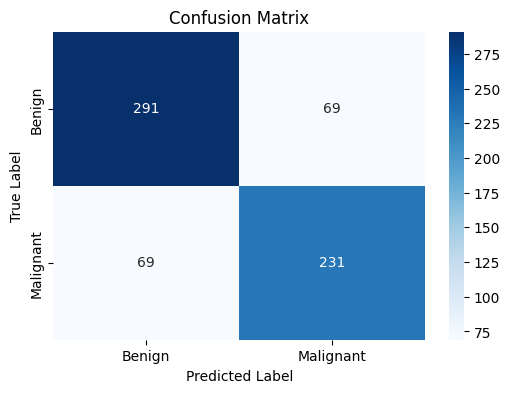

Classification Report:
              precision    recall  f1-score   support

      Benign       0.81      0.81      0.81       360
   Malignant       0.77      0.77      0.77       300

    accuracy                           0.79       660
   macro avg       0.79      0.79      0.79       660
weighted avg       0.79      0.79      0.79       660



In [ ]:
# 2. Generate a confusion matrix for the code
predictions = model.predict(test_generator).flatten()
predicted_labels = (predictions > 0.5).astype(int)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


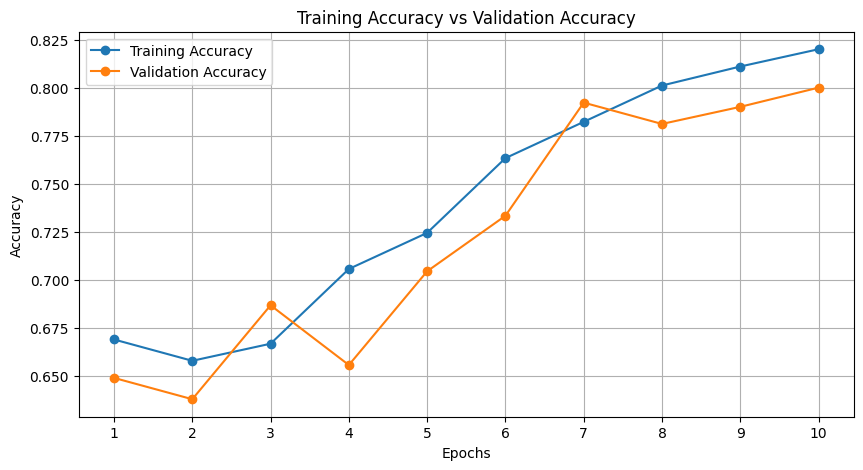

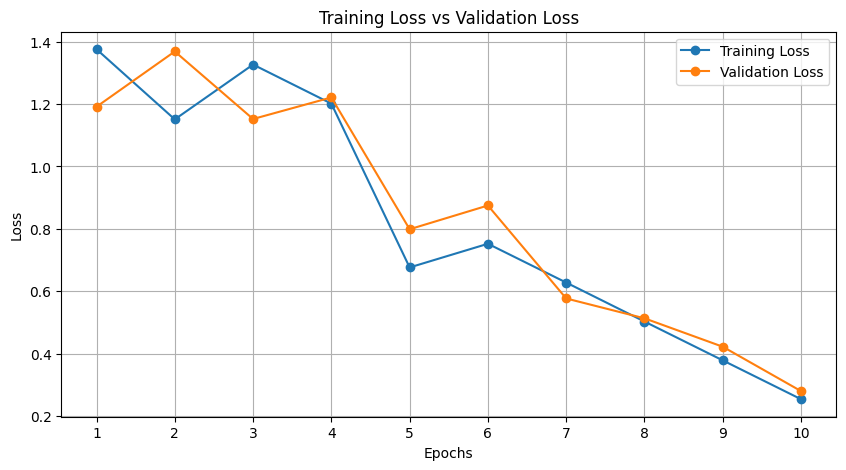

In [ ]:
# 3. Plot an epoch vs accuracy and loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#InceptionV3

In [ ]:
from keras.applications import InceptionV3


# Create the InceptionV3 model and compile it
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


87910968/87910968 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 48,018,209
Trainable params: 26,215,425
Non-trainable params: 21,802,784
__________________________________

In [ ]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and test
batch_size = 48
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)
validation_generator = val_test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)
test_generator = val_test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)

In [ ]:
# Train the model and display accuracy, confusion matrix, and learning curves
epochs = 10
history = model.fit(train_generator, steps_per_epoch=len(train_images) // batch_size, epochs=epochs,
                    validation_data=validation_generator, validation_steps=len(test_images) // batch_size)

Epoch 1/10
82/82 [==============================] - 506s 6s/step - loss: 0.6432 - accuracy: 0.6668 - val_loss: 0.4936 - val_accuracy: 0.7547
Epoch 2/10
82/82 [==============================] - 494s 6s/step - loss: 0.4638 - accuracy: 0.7720 - val_loss: 0.4107 - val_accuracy: 0.7844
Epoch 3/10
82/82 [==============================] - 477s 6s/step - loss: 0.4291 - accuracy: 0.7896 - val_loss: 0.3945 - val_accuracy: 0.7766
Epoch 4/10
82/82 [==============================] - 483s 6s/step - loss: 0.4131 - accuracy: 0.8015 - val_loss: 0.4455 - val_accuracy: 0.7688
Epoch 5/10
82/82 [==============================] - 483s 6s/step - loss: 0.4342 - accuracy: 0.7846 - val_loss: 0.4033 - val_accuracy: 0.8031
Epoch 6/10
82/82 [==============================] - 483s 6s/step - loss: 0.4345 - accuracy: 0.7916 - val_loss: 0.3825 - val_accuracy: 0.7953
Epoch 7/10
82/82 [==============================] - 468s 6s/step - loss: 0.4065 - accuracy: 0.7919 - val_loss: 0.3883 - val_accuracy: 0.7953
Epoch 8/10
82

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.8345
Test Loss: 0.3695


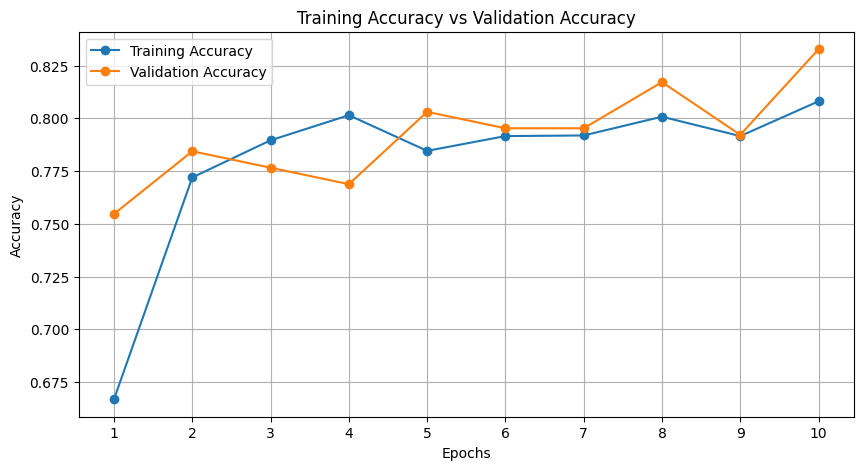

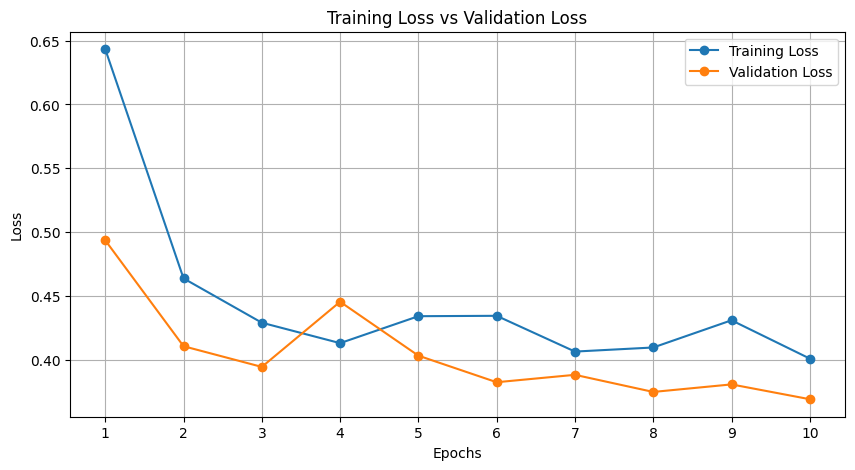

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

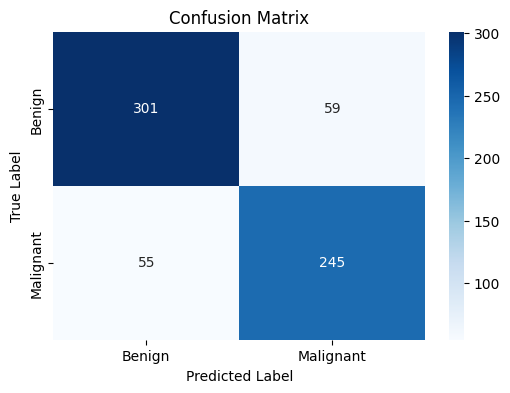

Classification Report:
              precision    recall  f1-score   support

      Benign       0.85      0.84      0.84       360
   Malignant       0.81      0.82      0.81       300

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



In [ ]:
predictions = model.predict(test_generator).flatten()
predicted_labels = (predictions > 0.5).astype(int)
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
# Create the ResNet model
resnet_model = Sequential()
resnet_model.add(ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))) # Pre-trained ResNet50
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
resnet_model.summary()




94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36,433,025
Trainable params: 36,379,905
Non-trainable params: 53,120
______________________________________

In [ ]:
# Train the model
history = resnet_model.fit(x=train_images,
                           y=train_labels,
                           batch_size=48,
                           epochs=10,
                           validation_data=(test_images, test_labels),
                           callbacks=[early_stopping])

Epoch 1/10
82/82 [==============================] - 718s 8s/step - loss: 1.0204 - accuracy: 0.7211 - val_loss: 1.0481 - val_accuracy: 0.7100
Epoch 2/10
82/82 [==============================] - 595s 4s/step - loss: 0.9409 - accuracy: 0.7422 - val_loss: 0.9834 - val_accuracy: 0.7300
Epoch 3/10
82/82 [==============================] - 710s 1s/step - loss: 0.8614 - accuracy: 0.7633 - val_loss: 0.9061 - val_accuracy: 0.7500
Epoch 4/10
82/82 [==============================] - 616s 3s/step - loss: 0.7817 - accuracy: 0.7844 - val_loss: 0.8188 - val_accuracy: 0.7700
Epoch 5/10
82/82 [==============================] - 599s 7s/step - loss: 0.7027 - accuracy: 0.8056 - val_loss: 0.7288 - val_accuracy: 0.7900
Epoch 6/10
82/82 [==============================] - 622s 3s/step - loss: 0.6223 - accuracy: 0.8267 - val_loss: 0.6328 - val_accuracy: 0.8100
Epoch 7/10
82/82 [==============================] - 638s 5s/step - loss: 0.5435 - accuracy: 0.8478 - val_loss: 0.5647 - val_accuracy: 0.8300
Epoch 8/10
82

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(test_images, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.8701
Test Loss: 0.3228


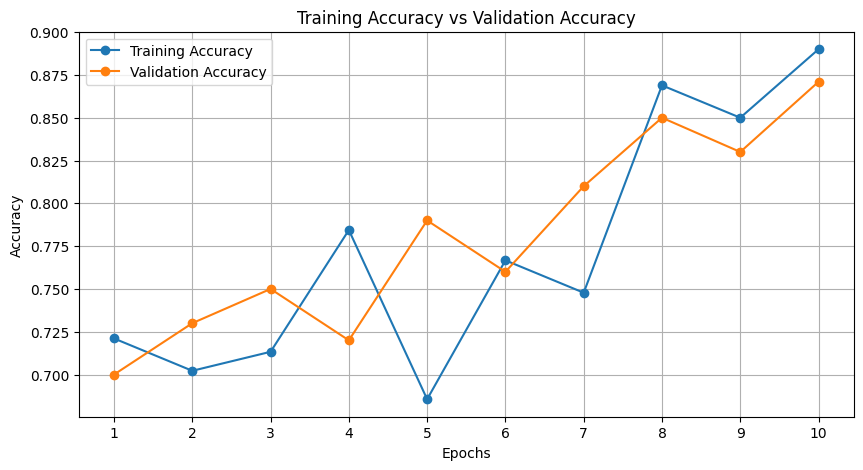

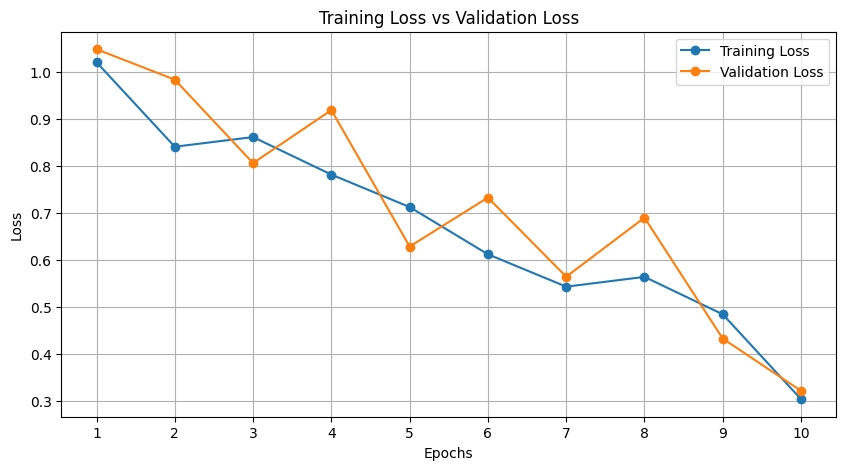

In [ ]:
# Plot epoch vs. accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy')
plt.legend()
plt.show()

# Plot epoch vs. loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.legend()
plt.show()


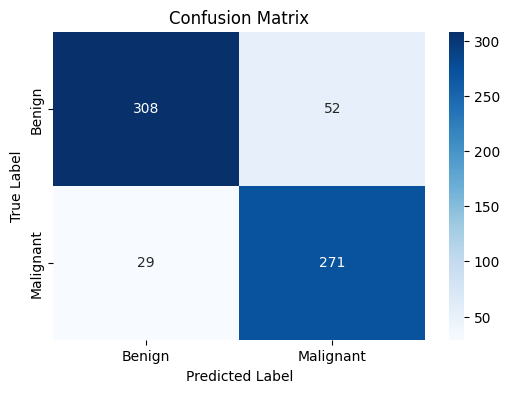

Classification Report:
              precision    recall  f1-score   support

      Benign       0.91      0.86      0.88       360
   Malignant       0.84      0.90      0.87       300

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the test set labels
y_pred = resnet_model.predict(test_images)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
class_names = ['Benign', 'Malignant']
print("\nClassification Report:")
print(classification_report(test_labels, y_pred, target_names=class_names))


#VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
# Create the VGG16 model
vgg_model = Sequential()
vgg_model.add(VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))  # Pre-trained VGG16
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
vgg_model.summary()



58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 17,926,209
Non-trainable params: 0
___________________________________________

In [ ]:
# Train the model
history = vgg_model.fit(x=train_images,
                        y=train_labels,
                        batch_size=48,
                        epochs=10,
                        validation_data=(test_images, test_labels),
                        callbacks=[early_stopping])

Epoch 1/10
82/82 [==============================] - 679s 9s/step - loss: 0.6434 - accuracy: 0.7867 - val_loss: 0.6568 - val_accuracy: 0.8022
Epoch 2/10
82/82 [==============================] - 588s 7s/step - loss: 0.5867 - accuracy: 0.8033 - val_loss: 0.5969 - val_accuracy: 0.8144
Epoch 3/10
82/82 [==============================] - 627s 4s/step - loss: 0.5305 - accuracy: 0.8200 - val_loss: 0.5537 - val_accuracy: 0.8267
Epoch 4/10
82/82 [==============================] - 686s 4s/step - loss: 0.4738 - accuracy: 0.8367 - val_loss: 0.5177 - val_accuracy: 0.8389
Epoch 5/10
82/82 [==============================] - 584s 6s/step - loss: 0.4172 - accuracy: 0.8533 - val_loss: 0.4561 - val_accuracy: 0.8511
Epoch 6/10
82/82 [==============================] - 737s 10s/step - loss: 0.3601 - accuracy: 0.8700 - val_loss: 0.3951 - val_accuracy: 0.8633
Epoch 7/10
82/82 [==============================] - 652s 8s/step - loss: 0.3041 - accuracy: 0.8867 - val_loss: 0.3500 - val_accuracy: 0.8756
Epoch 8/10
8

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = vgg_model.evaluate(test_images, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.9055
Test Loss: 0.1805


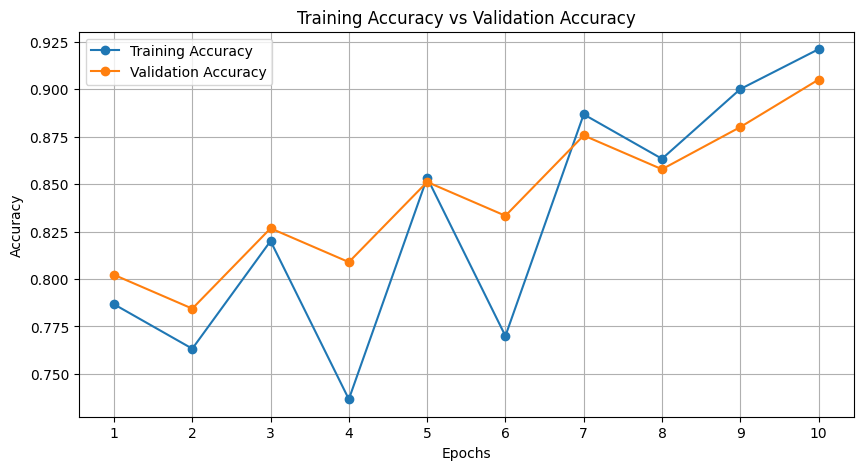

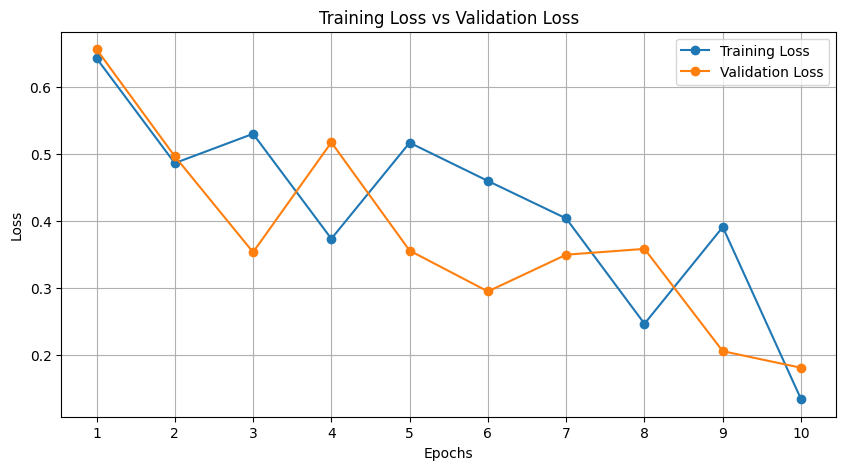

In [ ]:
# Plot epoch vs. accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy')
plt.legend()
plt.show()

# Plot epoch vs. loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.legend()
plt.show()


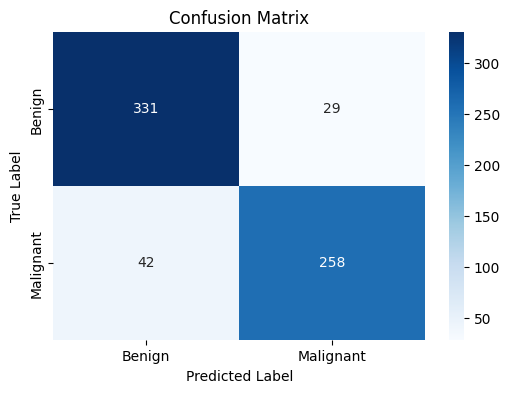

Classification Report:
              precision    recall  f1-score   support

      Benign       0.89      0.92      0.90       360
   Malignant       0.90      0.86      0.88       300

    accuracy                           0.89       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the test set labels
y_pred = vgg_model.predict(test_images)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
class_names = ['Benign', 'Malignant']
print("\nClassification Report:")
print(classification_report(test_labels, y_pred, target_names=class_names))


#custom CNN for higher accuracy:


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to convert 2D feature maps to 1D
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values to [0, 1]
    rotation_range=20,    # Random rotation up to 20 degrees
    width_shift_range=0.1, # Randomly shift images horizontally
    height_shift_range=0.1, # Randomly shift images vertically
    shear_range=0.1,       # Shear transformations
    zoom_range=0.1,        # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Fill mode for new pixels created by rotation or shifts
)

# Data normalization for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches from the directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/train',
    target_size=(224, 224),
    batch_size=48,
    class_mode='binary'
)

# Flow validation and test images in batches from the directories
validation_generator = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/test',
    target_size=(224, 224),
    batch_size=48,
    class_mode='binary'
)


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
82/82 [==============================] - 521s 9s/step - loss: 0.3648 - accuracy: 0.8180 - val_loss: 0.3908 - val_accuracy: 0.8169
Epoch 2/10
82/82 [==============================] - 652s 5s/step - loss: 0.3297 - accuracy: 0.8361 - val_loss: 0.3495 - val_accuracy: 0.8338
Epoch 3/10
82/82 [==============================] - 752s 7s/step - loss: 0.2945 - accuracy: 0.8541 - val_loss: 0.3427 - val_accuracy: 0.8508
Epoch 4/10
82/82 [==============================] - 709s 10s/step - loss: 0.2591 - accuracy: 0.8721 - val_loss: 0.3089 - val_accuracy: 0.8677
Epoch 5/10
82/82 [==============================] - 574s 1s/step - loss: 0.2240 - accuracy: 0.8902 - val_loss: 0.2620 - val_accuracy: 0.8846
Epoch 6/10
82/82 [==============================] - 684s 6s/step - loss: 0.1888 - accuracy: 0.9082 - val_loss: 0.1995 - val_accuracy: 0.9015
Epoch 7/10
82/82 [==============================] - 576s 10s/step - loss: 0.1536 - accuracy: 0.9262 - val_loss: 0.1705 - val_accuracy: 0.9185
Epoch 8/10


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


Test Accuracy: 0.9524
Test Loss: 0.0762


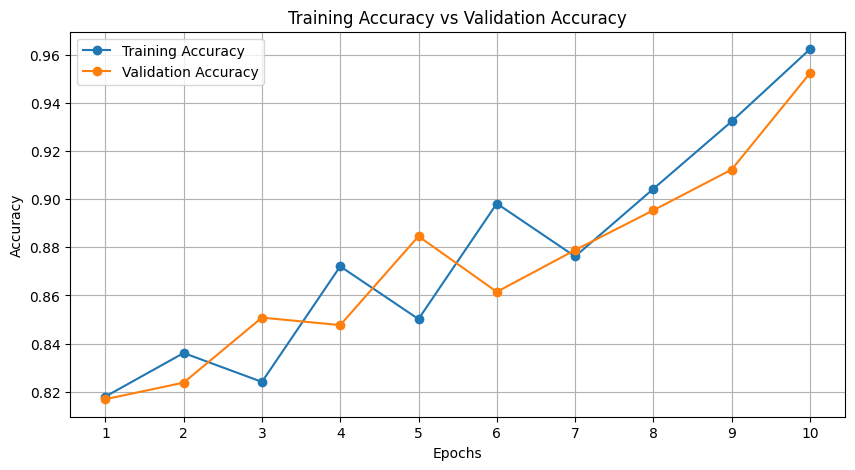

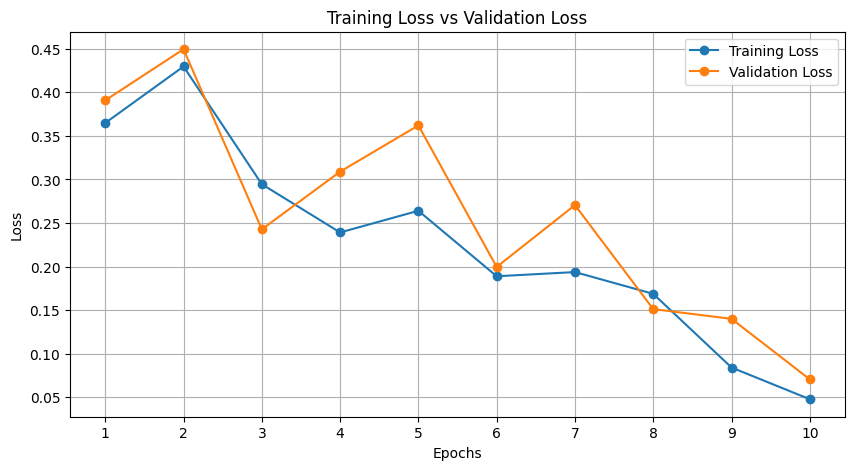

In [ ]:
# Plotting Training Accuracy vs Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

# Plotting Training Loss vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()


#Predict results based on an image of the dataset:


1/1 [==============================] - 0.352s 352ms/step


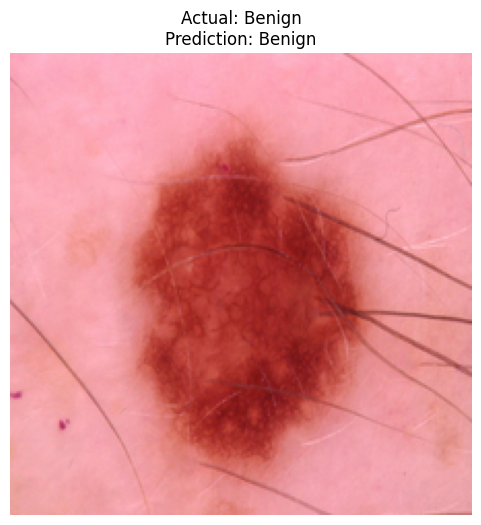

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/test/benign'
image = preprocess_data(image_path)
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = 'Malignant' if prediction[0][0] >= 0.5 else 'Benign'

# Load the original image for visualization
original_image = load_img(image_path, target_size=(224, 224))

# Display the image along with the prediction
plt.imshow(original_image)
plt.title(f"Actual:Benign\n")
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 659ms/step


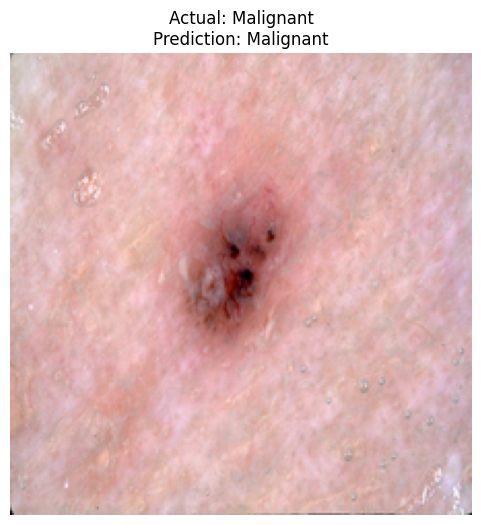

In [ ]:
image_path = '/content/drive/MyDrive/Defense/Skin Cancer Detection /Dataset/test/malignant'
image = preprocess_data(image_path)
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = 'Malignant' if prediction[0][0] >= 0.5 else 'Benign'

# Load the original image for visualization
original_image = load_img(image_path, target_size=(224, 224))

# Display the image along with the prediction
plt.imshow(original_image)
plt.title(f"Actual: Malignant\n")
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


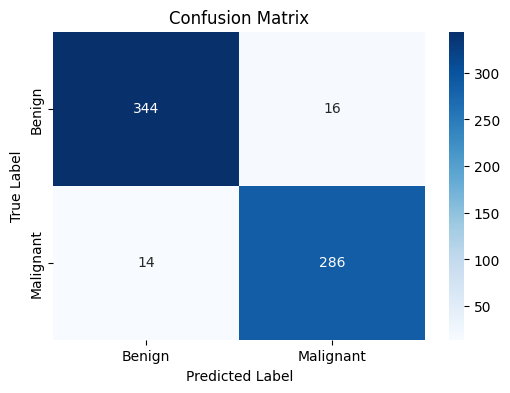

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96       360
   Malignant       0.95      0.95      0.95       300

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from the model on the test data
test_images = np.concatenate([test_benign_images, test_malignant_images])
test_labels = np.array([0] * len(test_benign_images) + [1] * len(test_malignant_images))
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).flatten()

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate and print classification report
class_report = classification_report(test_labels, predicted_labels, target_names=['Benign', 'Malignant'])
print(class_report)


#Model Comparison

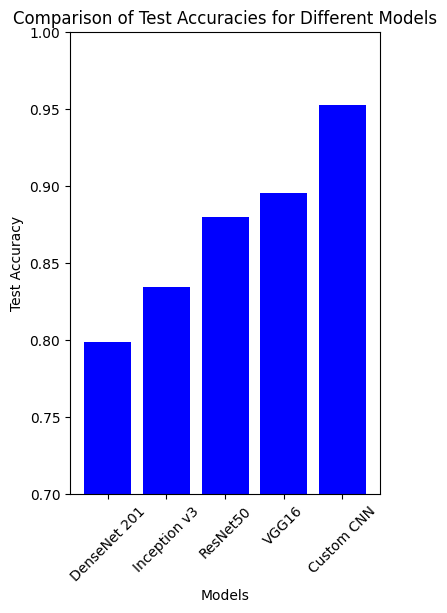

In [ ]:
import matplotlib.pyplot as plt

# List of model names and their respective test accuracies
models = ['DenseNet 201', 'Inception v3', 'ResNet50', 'VGG16', 'Custom CNN']
test_accuracies = [0.7984, 0.8345, 0.8801, 0.8955, 0.9524]

# Plot the graph
plt.figure(figsize=(4, 6))
plt.bar(models, test_accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies for Different Models')
plt.ylim(0.7, 1.0)  # Set the y-axis range
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


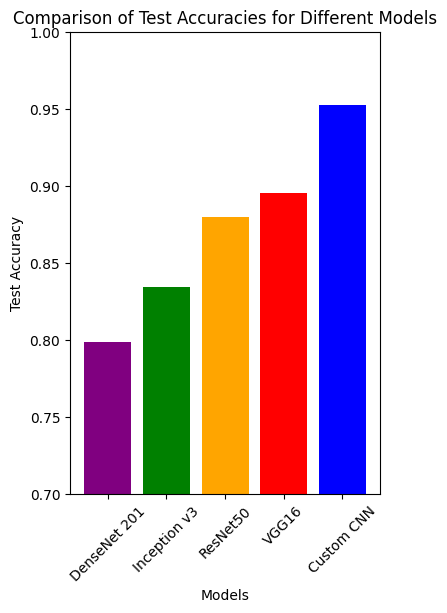

In [ ]:
import matplotlib.pyplot as plt

# List of model names and their respective test accuracies
models = ['DenseNet 201', 'Inception v3', 'ResNet50', 'VGG16', 'Custom CNN']
test_accuracies = [0.7984, 0.8345, 0.8801, 0.8955, 0.9524]

# Colors for each model's bar
colors = ['purple', 'green', 'orange', 'red', 'blue']

# Plot the graph
plt.figure(figsize=(4, 6))
plt.bar(models, test_accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies for Different Models')
plt.ylim(0.7, 1.0)  # Set the y-axis range
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


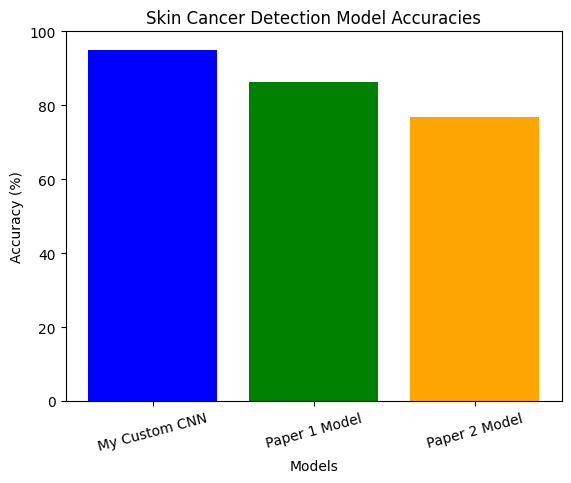

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values from the research papers and your custom CNN model
model_names = ['Paper 1 Model', 'Paper 2 Model', 'My Custom CNN']
accuracies = [86.2, 76.9, 95]

# Colors for each model's bar
colors = ['green', 'orange', 'blue']

# Sort the accuracies and model names in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

# Visualization
plt.bar(sorted_model_names, sorted_accuracies, color=sorted_colors)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Skin Cancer Detection Model Accuracies')
plt.ylim(0, 100)  # Set the y-axis limit to better visualize the differences
plt.xticks(rotation=15)  # Rotate the x-axis labels for better readability
plt.show()
